## Block 1

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Block 2

In [2]:
# Loading the data in
filename = 'messed_up_iris.xlsx'
data = pd.read_excel(filename)
data1 = data.drop(data.columns[[0]], axis = 1) # dropping the extra index column 
shape = data1.shape
head = data1.head()
print('------------ Shape ------------')
print(shape)
print('------------ Head ------------')
print(head)

------------ Shape ------------
(150, 7)
------------ Head ------------
   sepal_length  sepal_width  petal_length  petal_width species   color  origin
0           5.1          3.5           1.4          0.2  setosa   green     usa
1           4.9          3.0           1.4          0.2  setosa  yellow     usa
2           4.7          3.2           1.3          0.2  setosa   green     usa
3           4.6          3.1           1.5          0.2  setosa  orange   japan
4           5.0          3.6           1.4          0.2  setosa    blue  europe


## Block 3

In [3]:
# removing columns/rows that have more than 50% of data missing
#sns.heatmap(datano.isnull(),cmap=['Green','Red'])
data2 = data1.drop(['color'], axis = 1)
data2.head()
datano = data2.dropna(thresh = 4)
print('------------ New Shape ------------')
nshape = datano.shape
print(nshape)

------------ New Shape ------------
(145, 6)


## Block 4

In [4]:
# removing duplicated data
any(datano.duplicated())
datano[datano.duplicated (keep = False)]
datanomo = datano.drop_duplicates(ignore_index = True)
any(datanomo.duplicated())
print('------------ NO Duplicates Shape ------------')
datanomo.shape

------------ NO Duplicates Shape ------------


(140, 6)

## Block 5

In [5]:
# Dummy code the categorical data
datanomo['species'] = np.where(datanomo['species'] == 'seotsa','setosa',datanomo['species'])
datanomo['species'] = np.where(datanomo['species'] == 'versicolr','versicolor',datanomo['species'])
datanomo['species'] = np.where(datanomo['species'] == 'virginia','virginica',datanomo['species'])
datanomo['species'] = np.where(datanomo['species'] == 'west virginia','virginica',datanomo['species'])
datanomo['origin'] = np.where(datanomo['origin'] == 'euarope','europe',datanomo['origin'])
datanomo['origin'] = np.where(datanomo['origin'] == 'uas','usa',datanomo['origin'])
species_only = pd.get_dummies(datanomo['species'])
print('------------ Species head ------------')
sh = species_only.head()
print(sh)
origin_only = pd.get_dummies(datanomo['origin'])
print('------------ Origin head ------------')
oh = origin_only.head()
print(oh)

------------ Species head ------------
   setosa  versicolor  virginica
0       1           0          0
1       1           0          0
2       1           0          0
3       1           0          0
4       1           0          0
------------ Origin head ------------
   europe  japan  usa
0       0      0    1
1       0      0    1
2       0      0    1
3       0      1    0
4       1      0    0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Block 6

In [6]:
# Dropping the redundant columns
datanomo = pd.concat([datanomo.drop('species',axis=1), pd.get_dummies(datanomo['species'],drop_first=True)], axis=1)
datanomo = pd.concat([datanomo.drop('origin',axis=1), pd.get_dummies(datanomo['origin'],drop_first=True)], axis=1)
print('------------ Dummy columns ------------')
datanomo.head()

------------ Dummy columns ------------


,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,japan,usa
0,5.1,3.5,1.4,0.2,0,0,0,1
1,4.9,3.0,1.4,0.2,0,0,0,1
2,4.7,3.2,1.3,0.2,0,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1,0
4,5.0,3.6,1.4,0.2,0,0,0,0


## Block 7

In [7]:
# Creating a new copy
datanew = datanomo.copy()
def remove_outliers(ser):
  Q1 = ser.quantile(.20)
  Q3 = ser.quantile(.80)
  IQR = Q3 - Q1
  return np.where((ser > (Q3+(IQR*1.5))) | (ser < (Q1-(IQR*1.5))), np.nan,ser) # only 90 percentile

In [8]:
# Removing outliers
for column in datanew.columns:
  if isinstance(datanew[column][0],float)==1:
    datanew[column] = remove_outliers(datanew[column])

## Block 8

In [9]:
# Replacing with median value
f_data = datanew.fillna(data.median())
final_data = pd.concat([f_data],axis=1)
final_data.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,japan,usa
0,5.1,3.5,1.4,0.2,0,0,0,1
1,4.9,3.0,1.4,0.2,0,0,0,1
2,4.7,3.2,1.3,0.2,0,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1,0
4,5.0,3.6,1.4,0.2,0,0,0,0


## Block 9

In [10]:
## Extra credit

## Block 10

------------ Describing it ------------  
       sepal_length  sepal_width  ...       japan         usa
count    140.000000   140.000000  ...  140.000000  140.000000
mean       5.872143     3.057857  ...    0.300000    0.364286
std        0.791508     0.431505  ...    0.459903    0.482957
min        4.300000     2.000000  ...    0.000000    0.000000
25%        5.200000     2.800000  ...    0.000000    0.000000
50%        5.800000     3.000000  ...    0.000000    0.000000
75%        6.400000     3.300000  ...    1.000000    1.000000
max        7.900000     4.400000  ...    1.000000    1.000000

[8 rows x 8 columns]
------------ No More NaN ------------  
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, versicolor, virginica, japan, usa]
Index: []


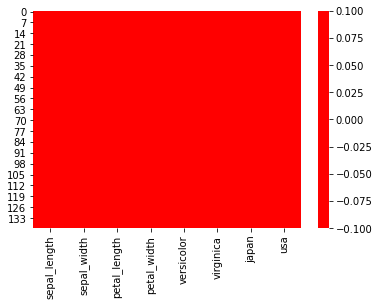

In [11]:
# showing off no more NAs
print('------------ Describing it ------------  ')
sns.heatmap(final_data.isnull(),cmap=['Red','Red'])
is_NaN = final_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
w = final_data.fillna(data.median())[row_has_NaN]
#showing off the final dataset
y = final_data.describe()
print(y)
print('------------ No More NaN ------------  ')
print(w)

In [12]:
final_data.shape

(140, 8)